In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
import pickle

Trainings und Testdaten laden

In [13]:
file = open('stock.pkl', 'rb') 
X_train, y_train = pickle.load(file)
file.close()

file = open('stock_test.pkl', 'rb')
X_test, y_test = pickle.load(file)
file.close()

X_train = X_train.reshape(X_train.shape[0], 
                          X_train.shape[1], 
                          1)

Model laden

In [14]:
model = load_model('stockpredmod.h5')

Laden der CSV Dateien (für die X-Achse)

In [22]:
x_axis_train = pd.read_csv('Google_Stock_Price_Train.csv', 
                       thousands = ',')['Date']
x_axis_train = pd.to_datetime(x_axis_train)


x_axis_test = pd.read_csv('Google_Stock_Price_Test.csv', 
                       thousands = ',')['Date']
x_axis_test = pd.to_datetime(x_axis_test)

In [28]:
print(x_axis_train)
print(x_axis_test)
print(X_train.shape)

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1253   2016-12-23
1254   2016-12-27
1255   2016-12-28
1256   2016-12-29
1257   2016-12-30
Name: Date, Length: 1258, dtype: datetime64[ns]
0    2017-01-03
1    2017-01-04
2    2017-01-05
3    2017-01-06
4    2017-01-09
5    2017-01-10
6    2017-01-11
7    2017-01-12
8    2017-01-13
9    2017-01-17
10   2017-01-18
11   2017-01-19
12   2017-01-20
13   2017-01-23
14   2017-01-24
15   2017-01-25
16   2017-01-26
17   2017-01-27
18   2017-01-30
19   2017-01-31
Name: Date, dtype: datetime64[ns]
(1198, 60, 1)


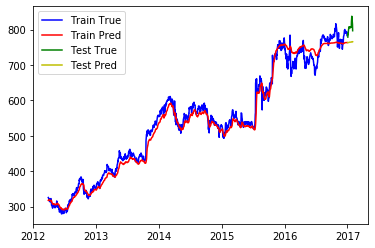

In [36]:
plt.plot(x_axis_train.iloc[60:], y_train, '-b', label = 'Train True')
plt.plot(x_axis_train.iloc[60:], model.predict(X_train), 
                                 '-r', label = 'Train Pred')

plt.plot(x_axis_test, y_test, '-g', label = 'Test True')
plt.plot(x_axis_test, model.predict(X_test), '-y', label = 'Test Pred')

plt.legend()
plt.show()